# K Nearest Neighbors

Here you explain the theory behind KNN

In [93]:
# First thing first we import the lybraries that we'll be using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [89]:
# Create the dataframe
df=pd.read_csv('pima-indians-diabetes.csv')
df.head(10)

,Times_Pregnant,Glucose_Conc,Diastolic_Pressure,Triceps_Thickness,Insulin,Body_Mass_Index,Diabetes_Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Data exploration

In [86]:
df.info()  ## no null values detected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Times_Pregnant      768 non-null    int64  
 1   Glucose_Conc        768 non-null    int64  
 2   Diastolic_Pressure  768 non-null    int64  
 3   Triceps_Thickness   768 non-null    int64  
 4   Insulin             768 non-null    int64  
 5   Body_Mass_Index     768 non-null    float64
 6   Diabetes_Pedigree   768 non-null    float64
 7   Age                 768 non-null    int64  
 8   Diabetes            768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
df.describe()

,Times_Pregnant,Glucose_Conc,Diastolic_Pressure,Triceps_Thickness,Insulin,Body_Mass_Index,Diabetes_Pedigree,Age,Diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


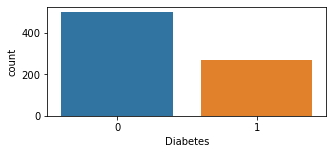

In [94]:
#  Countplot of people with diabetes
plt.figure(figsize=(5,2))
sns.countplot(df['Diabetes'])  ## Most of the cases have a negative diagnosis for diabetes

### Now we create and train our model

In [70]:
# Separate the data
y = df['Diabetes'].values
X = df.drop('Diabetes', axis = 1).values  ##Axis 0 for row, axis 1 for column
print(X.shape, y.shape)
print(type(y), type(X))

(768, 8) (768,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [71]:
# Generate our train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_test.shape)

(614, 8) (154,)


In [72]:
# Model 
knn=KNeighborsClassifier(n_neighbors = 3)

In [73]:
# Training
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### We are ready to make and evaluate our predictions

In [74]:
y_predict = knn.predict(X_test)
y_predict  ## This are our results

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [75]:
# Accuracy Train
print('Train accuracy: ', knn.score(X_train, y_train))
print('Test accuracy: ', knn.score(X_test, y_test))

Train accuracy:  0.8517915309446255
Test accuracy:  0.7207792207792207


In [76]:
# Confusion matrix
pd.crosstab(y_predict, y_test, rownames=['Prediction'], colnames=['Real Value']) 

Real Value,0,1
Prediction,,
0,83,19
1,24,28


In [77]:
print(classification_report(y_test,y_predict))  ## Full report

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       107
           1       0.54      0.60      0.57        47

    accuracy                           0.72       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.72      0.72       154



As we can see, the overall accuracy is not as high as we would like it to be. Therefore we are going to generate a loop that evaluates our model within a range of a certain number of k neighbors.

<function matplotlib.pyplot.show(*args, **kw)>

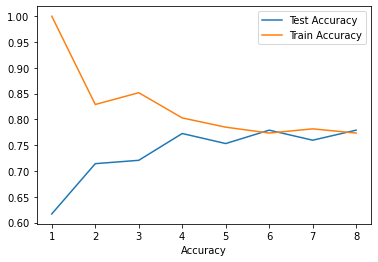

In [95]:
neighbors= np.arange(1 , 9)  ## Neighbors range
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    # Acuracy training
    train_accuracy[i] = knn.score(X_train, y_train) 
    # Acuracy testing
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Plot
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.xlabel('Accuracy')
plt.show


Elegiremos el valor 6 (debido a que fue el que presento el primer accuracy mas alto en test) y volveremos a generar el modelo con dicho parametro.

In [79]:
# Model creation (again)
knn2=KNeighborsClassifier(n_neighbors = 6)

In [80]:
# Training
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [81]:
y_predict2 = knn2.predict(X_test)
y_predict2  ## This are our results

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [82]:
# Accuracy Train
print('Train accuracy: ', knn2.score(X_train, y_train))
print('Test accuracy: ', knn2.score(X_test, y_test))

Train accuracy:  0.7736156351791531
Test accuracy:  0.7792207792207793


In [83]:
# Confusion matrix
pd.crosstab(y_predict2, y_test, rownames=['Prediction'], colnames=['Real Value']) 

Real Value,0,1
Prediction,,
0,94,21
1,13,26


In [85]:
print(classification_report(y_test,y_predict2))  ## Full report

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.67      0.55      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.77      0.78      0.77       154



Now we can see a small improvement (5%) in the model's accuracy and recall. 